<a href="https://colab.research.google.com/github/AUT-Student/NN-HW2/blob/main/NN_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Create Linear Separable Dataset

In [59]:
cov = [[1, 0], [0, 1]]

mean_0 = [0,0]
mean_1 = [8,8]

number_data_per_class = 5000

In [60]:
dataset_0 = pd.DataFrame(np.random.multivariate_normal(mean_0, cov, number_data_per_class), columns=["X1", "X2"])
dataset_0["Y"] = [-1] * number_data_per_class 

dataset_1 = pd.DataFrame(np.random.multivariate_normal(mean_1, cov, number_data_per_class), columns=["X1", "X2"])
dataset_1["Y"] = [+1] * number_data_per_class

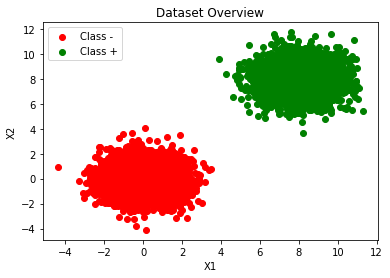

In [61]:
plt.scatter(dataset_0["X1"], dataset_0["X2"], label="Class -", c="red")
plt.scatter(dataset_1["X1"], dataset_1["X2"], label="Class +", c="green")

plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset Overview")
plt.show()

In [62]:
dataset = pd.concat([dataset_0, dataset_1], ignore_index= True)
dataset = dataset.sample(frac=1).reset_index()

# 70% train, 10% validation, 20% test
train_dataset = dataset[:7000]
validation_dataset = dataset[7000:8000]
test_dataset = dataset[8000:]

# Create XOR Dataset

In [155]:
cov = [[1, 0], [0, 1]]

mean_00 = [0, 0]
mean_01 = [0, 10] 
mean_10 = [10, 0] 
mean_11 = [10, 10] 

number_data_per_part = 2500

In [156]:
dataset_00 = pd.DataFrame(np.random.multivariate_normal(mean_00, cov, number_data_per_part), columns=["X1", "X2"])
dataset_00["Y"] = [-1] * number_data_per_part 

dataset_11 = pd.DataFrame(np.random.multivariate_normal(mean_11, cov, number_data_per_part), columns=["X1", "X2"])
dataset_11["Y"] = [-1] * number_data_per_part 

dataset_01 = pd.DataFrame(np.random.multivariate_normal(mean_01, cov, number_data_per_part), columns=["X1", "X2"])
dataset_01["Y"] = [+1] * number_data_per_part 

dataset_10 = pd.DataFrame(np.random.multivariate_normal(mean_10, cov, number_data_per_part), columns=["X1", "X2"])
dataset_10["Y"] = [+1] * number_data_per_part 

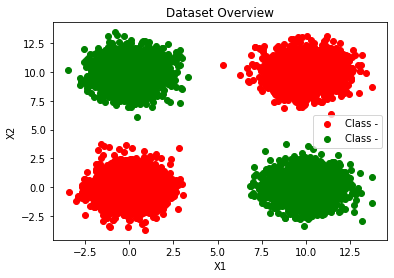

In [157]:
plt.scatter(dataset_00["X1"].append(dataset_11["X1"]), dataset_00["X2"].append(dataset_11["X2"]), label="Class -", c="red")
plt.scatter(dataset_01["X1"].append(dataset_10["X1"]), dataset_01["X2"].append(dataset_10["X2"]), label="Class -", c="green")

plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset Overview")
plt.show()

In [158]:
dataset = pd.concat([dataset_00, dataset_01, dataset_10, dataset_11], ignore_index= True)
dataset = dataset.sample(frac=1).reset_index()

# 70% train, 10% validation, 20% test
train_dataset = dataset[:7000]
validation_dataset = dataset[7000:8000]
test_dataset = dataset[8000:]

# Activation Functions

In [159]:
class ActivationFunctions():

  @staticmethod
  def sigmoid(x):
    return 1 / (1 + math.exp(-x))

  @staticmethod
  def bipolar_sigmoid(x):
    return (1 - math.exp(-x)) / (1 + math.exp(-x))

  @staticmethod
  def identity(x):
    return x

# Perceptron

In [150]:
class Perceptron():
  def __init__(self, w, alpha, activation_function):
    self.w = w
    self.alpha = alpha
    self.activation_function = activation_function
    self.error_values = []

  def predict(self, X):
    I = self.w @ np.concatenate(([1], X))
    y = self.activation_function(I)
    if y >= 0:
      return +1
    else:
      return -1

  def error(self, X, t):
    sum = 0
    for i in range(len(t)):
      sum += np.abs(self.predict(X[i]) - t[i])
    return sum/(2*len(t))

  def train_sample(self, X, t):
    y = self.predict(X)
    self.w = self.w + self.alpha * (t-y) * np.concatenate(([1], X))
  
  def train(self, X_train, y_train, X_validation, y_validation, epochs):
    for epoch in range(epochs):
      for i in range(len(X_train)):
        self.train_sample(X_train[i], y_train[i])

        if (i+1)%1000 == 0:
          self.error_values.append(
              {"i": epoch*len(X_train) + i,
               "train": self.error(X_train, y_train),
               "validation": self.error(X_validation, y_validation)
               })
    

  def show_error_values(self):
    i_list = []
    train_error_list = []
    validation_error_list = []

    for item in self.error_values:
      i_list.append(item["i"])
      train_error_list.append(item["train"])
      validation_error_list.append(item["validation"])
    
    plt.scatter(i_list, train_error_list, c="blue", label="Train Error", alpha=0.5)
    plt.plot(i_list, train_error_list, c="blue", alpha=0.5)
    plt.scatter(i_list, validation_error_list, c="red", label="Validation Error", alpha=0.5)
    plt.plot(i_list, validation_error_list, c="red", alpha=0.5)

    plt.legend()
    plt.xlabel("Number Trained Data")
    plt.ylabel("Error")
    plt.title("Error Changes in Training of the Perceptron")
    plt.show()


  def show_decision_boundry(self, dataset):
    plt.scatter(dataset[dataset["Y"]==-1]["X1"], dataset[dataset["Y"]==-1]["X2"], label="Class -", c="red")
    plt.scatter(dataset[dataset["Y"]==+1]["X1"], dataset[dataset["Y"]==+1]["X2"], label="Class +", c="green")

    x = np.linspace(-4, 12, 1000)
    plt.plot(x, (-self.w[1]/self.w[2]*x)-self.w[0]/self.w[2], label="Decision Boundry", c="blue")

    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Perceptron Decision Boundary")
    plt.show()    

In [151]:
perceptron = Perceptron(w=np.zeros([3]), alpha=0.1, activation_function=ActivationFunctions.bipolar_sigmoid)

In [152]:
perceptron.train(
    X_train = train_dataset[["X1", "X2"]].values,
    y_train = train_dataset["Y"].values,
    X_validation = validation_dataset[["X1", "X2"]].values,
    y_validation = validation_dataset["Y"].values,
    epochs = 5
)

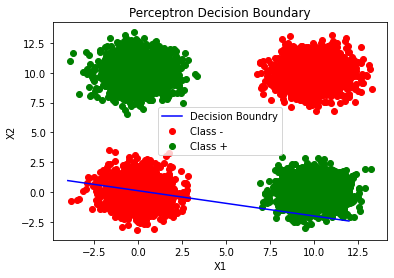

In [153]:
perceptron.show_decision_boundry(train_dataset)

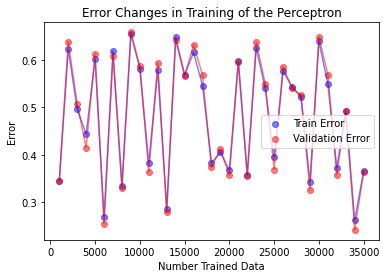

In [154]:
perceptron.show_error_values()

# Adaline

In [ ]:
class Adaline():
  def __init__(self, w, alpha, activation_function):
    self.w = w
    self.alpha = alpha
    self.activation_function = activation_function
  
  def linear_output(self, X):
    I = self.w @ np.concatenate(([1], X))
    y = self.activation_function(I)
    return y

  def bipolar_output(self, X):
    return np.sign(self.linear_output(X))

  def train_sample(self, X, t):
    y = self.linear_output(X)
    self.w = self.w + self.alpha * (t-y) * np.concatenate(([1], X))

  def train(self, dataset):
    for i, data in dataset.iterrows():
      X = data[["X1", "X2"]].values
      t = data["Y"]

      self.train_sample(X,t)

  def show_decision_boundry(self, dataset):
    plt.scatter(dataset[dataset["Y"]==-1]["X1"], dataset[dataset["Y"]==-1]["X2"], label="Class -", c="red")
    plt.scatter(dataset[dataset["Y"]==+1]["X1"], dataset[dataset["Y"]==+1]["X2"], label="Class +", c="green")

    x = np.linspace(-4, 12, 1000)
    plt.plot(x, (-self.w[1]/self.w[2]*x)-self.w[0]/self.w[2], label="Decision Boundry", c="blue")

    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Adaline Decision Boundary")
    plt.show()    

In [ ]:
adaline = Adaline(w=np.zeros([3]), alpha=.01, activation_function=ActivationFunctions.identity)

In [ ]:
adaline.train(train_dataset)

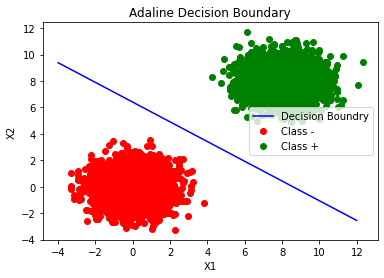

In [ ]:
adaline.show_decision_boundry(train_dataset)

# Perceptron2D

In [37]:
class Perceptron2D():
  def __init__(self, w, alpha, activation_function):
    self.w = w
    self.alpha = alpha
    self.activation_function = activation_function

  def predict(self, X):
    I = self.w @ np.array([1, X[0], X[1], X[0]**2, X[1]**2]) 
    y = self.activation_function(I)
    return y

  def train_sample(self, X, t):
    y = self.predict(X)
    self.w = self.w + self.alpha * (t-y) * np.array([1, X[0], X[1], X[0]**2, X[1]**2])
  
  def train(self, dataset, epochs):
    for epoch in range(epochs):
      for i, data in dataset.iterrows():
        X = data[["X1", "X2"]].values
        t = data["Y"]
        self.train_sample(X,t)
      self.show_decision_boundry(dataset)

  def show_decision_boundry(self, dataset):
    plt.scatter(dataset[dataset["Y"]==-1]["X1"], dataset[dataset["Y"]==-1]["X2"], label="Class -", c="red")
    plt.scatter(dataset[dataset["Y"]==+1]["X1"], dataset[dataset["Y"]==+1]["X2"], label="Class +", c="green")

    x = np.linspace(-4, 14, 1000)

    w0, w1, w2, w3, w4 = self.w

    self.w[0] + self.w[1]*x + self.w[2] 

    plt.plot(x, -w2/w4 + np.sqrt(-w0/w4-w1/w4*x-w3/w4*x**2-(w2/w4)**2) , label="Decision Boundry", c="blue")
    plt.plot(x, -w2/w4 - np.sqrt(-w0/w4-w1/w4*x-w3/w4*x**2-(w2/w4)**2), c="blue")

    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Perceptron 2D Decision Boundary")
    plt.show()  

In [44]:
perceptron2d = Perceptron2D(w=np.zeros([5]), alpha=0.001, activation_function=ActivationFunctions.bipolar_sigmoid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


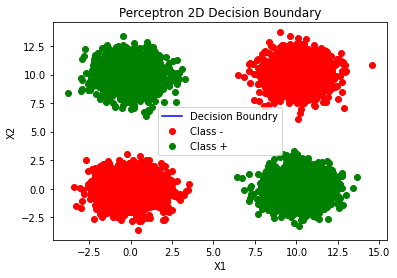

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


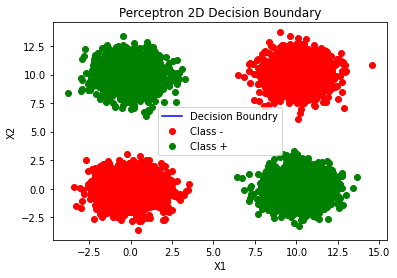

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


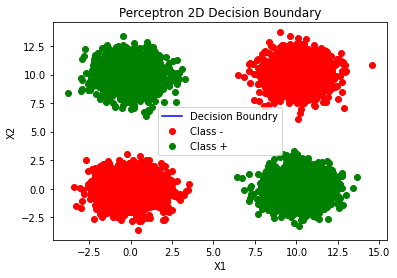

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


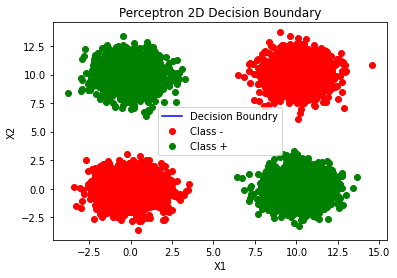

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


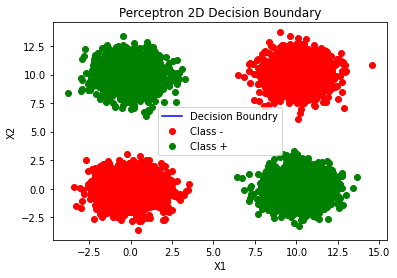

In [45]:
perceptron2d.train(dataset=train_dataset, epochs=5)

# Adaline2D

In [ ]:
class Adaline2D():
  def __init__(self, w, alpha, activation_function):
    self.w = w
    self.alpha = alpha
    self.activation_function = activation_function
  
  def linear_output(self, X):
    I = self.w @ np.array([1, X[0], X[1], X[0]**2, X[1]**2], X[0]*X[1])
    y = self.activation_function(I)
    return y

  def bipolar_output(self, X):
    return np.sign(self.linear_output(X))

  def train_sample(self, X, t):
    y = self.linear_output(X)
    self.w = self.w + self.alpha * (t-y) * np.array([1, X[0], X[1], X[0]**2, X[1]**2], X[0]*X[1])

  def train(self, dataset):
    for i, data in dataset.iterrows():
      X = data[["X1", "X2"]].values
      t = data["Y"]

      self.train_sample(X,t)

  def show_decision_boundry(self, dataset):
    plt.scatter(dataset[dataset["Y"]==-1]["X1"], dataset[dataset["Y"]==-1]["X2"], label="Class -", c="red")
    plt.scatter(dataset[dataset["Y"]==+1]["X1"], dataset[dataset["Y"]==+1]["X2"], label="Class +", c="green")

    x = np.linspace(-4, 12, 1000)
    plt.plot(x, (-self.w[1]/self.w[2]*x)-self.w[0]/self.w[2], label="Decision Boundry", c="blue")

    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Adaline 2D Decision Boundary")
    plt.show()  